trace: 3916.035174452783 0.1
trace: 3916.035174452783 0.2
trace: 3916.035174452783 0.30000000000000004
trace: 3916.035174452783 0.4
trace: 3916.035174452783 0.5
trace: 3916.035174452783 0.6
trace: 3916.035174452783 0.7000000000000001
trace: 3916.035174452783 0.8
trace: 3916.035174452783 0.9
trace: 3916.035174452783 1.0
trace: 3872.335326896915 1.1
trace: 3872.335326896915 1.2000000000000002
trace: 3872.335326896915 1.3000000000000003
trace: 3872.335326896915 1.4000000000000001
trace: 3872.335326896915 1.5000000000000002
trace: 3872.335326896915 1.6
trace: 3872.335326896915 1.7000000000000002
trace: 3872.335326896915 1.8000000000000003
trace: 3872.335326896915 1.9000000000000001
trace: 3872.335326896915 2.0
trace: 3836.601053263212 2.1
trace: 3836.601053263212 2.2
trace: 3836.601053263212 2.3000000000000003
trace: 3836.601053263212 2.4000000000000004
trace: 3836.601053263212 2.5000000000000004
trace: 3836.601053263212 2.6
trace: 3836.601053263212 2.7
trace: 3836.601053263212 2.800000000

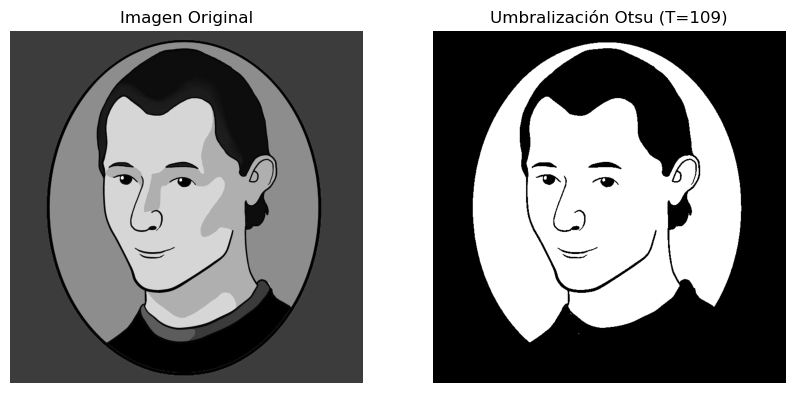

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def threshold_otsu_impl(image, nbins=0.1):
    
    #validate grayscale
    if len(image.shape) == 1 or len(image.shape) > 2:
        print("must be a grayscale image.")
        return
    
    #validate multicolored
    if np.min(image) == np.max(image):
        print("the image must have multiple colors")
        return
    
    all_colors = image.flatten()
    total_weight = len(all_colors)
    least_variance = -1
    least_variance_threshold = -1
    
    # create an array of all possible threshold values which we want to loop through
    color_thresholds = np.arange(np.min(image)+nbins, np.max(image)-nbins, nbins)
    
    # loop through the thresholds to find the one with the least within class variance
    for color_threshold in color_thresholds:
        bg_pixels = all_colors[all_colors < color_threshold]
        weight_bg = len(bg_pixels) / total_weight
        variance_bg = np.var(bg_pixels)

        fg_pixels = all_colors[all_colors >= color_threshold]
        weight_fg = len(fg_pixels) / total_weight
        variance_fg = np.var(fg_pixels)

        within_class_variance = weight_fg*variance_fg + weight_bg*variance_bg
        if least_variance == -1 or least_variance > within_class_variance:
            least_variance = within_class_variance
            least_variance_threshold = color_threshold
        print("trace:", within_class_variance, color_threshold)
            
    return least_variance_threshold

image = cv2.imread("maquiavelo.jpg", cv2.IMREAD_GRAYSCALE)

# Calcular umbral de Otsu con implementación manual
otsu_threshold = threshold_otsu_impl(image)

# Aplicar umbral a la imagen
_, otsu_binary = cv2.threshold(image, otsu_threshold, 255, cv2.THRESH_BINARY)

# Mostrar resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(otsu_binary, cmap="gray")
plt.title(f"Umbralización Otsu (T={otsu_threshold:.0f})")
plt.axis("off")

plt.show()